<a href="https://colab.research.google.com/github/Pennelli02/IAModels/blob/main/GeneratoreVolti.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Geneatore di volti**

In [11]:
!pip uninstall -y torch torchvision torchaudio accelerate diffusers transformers huggingface_hub peft fastai


Found existing installation: torch 2.7.1
Uninstalling torch-2.7.1:
  Successfully uninstalled torch-2.7.1
Found existing installation: torchvision 0.17.2+cu121
Uninstalling torchvision-0.17.2+cu121:
  Successfully uninstalled torchvision-0.17.2+cu121
Found existing installation: torchaudio 2.2.2+cu121
Uninstalling torchaudio-2.2.2+cu121:
  Successfully uninstalled torchaudio-2.2.2+cu121
Found existing installation: accelerate 0.30.1
Uninstalling accelerate-0.30.1:
  Successfully uninstalled accelerate-0.30.1
Found existing installation: diffusers 0.27.2
Uninstalling diffusers-0.27.2:
  Successfully uninstalled diffusers-0.27.2
Found existing installation: transformers 4.41.2
Uninstalling transformers-4.41.2:
  Successfully uninstalled transformers-4.41.2
Found existing installation: huggingface-hub 0.25.0
Uninstalling huggingface-hub-0.25.0:
  Successfully uninstalled huggingface-hub-0.25.0


##Pip necessari

In [12]:
# ⚡️ Installa versioni compatibili con GPU Colab A100/L4 e SDXL Lightning
!pip install --upgrade pip

# Installa huggingface_hub compatibile con diffusers 0.27.2
!pip install huggingface_hub==0.25.0

# Reinstalla torch, torchvision, torchaudio in versione GPU corretta
!pip install torch==2.2.2+cu121 torchvision==0.17.2+cu121 torchaudio==2.2.2+cu121 --index-url https://download.pytorch.org/whl/cu121

# Installa diffusers, transformers, accelerate e xformers
!pip install diffusers==0.27.2 transformers==4.41.2 accelerate==0.30.1 safetensors xformers

  Using cached huggingface_hub-0.25.0-py3-none-any.whl.metadata (13 kB)
Using cached huggingface_hub-0.25.0-py3-none-any.whl (436 kB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
timm 1.0.16 requires torch, which is not installed.
timm 1.0.16 requires torchvision, which is not installed.
sentence-transformers 4.1.0 requires torch>=1.11.0, which is not installed.
sentence-transformers 4.1.0 requires transformers<5.0.0,>=4.41.0, which is not installed.
gradio 5.31.0 requires huggingface-hub>=0.28.1, but you have huggingface-hub 0.25.0 which is incompatible.
Looking in indexes: https://download.pytorch.org/whl/cu121
  Using cached https://download.pytorch.org/whl/cu121/torch-2.2.2%2Bcu121-cp311-cp311-linux_x86_64.whl (757.3 MB)
  Using cached https://download.pytorch.org/whl/cu121/torchvision-0.17.2%2Bcu121-cp311-cp311-linux_x86_64.whl (7.0 MB)
  Using cached h

  Using cached diffusers-0.27.2-py3-none-any.whl.metadata (18 kB)
  Using cached transformers-4.41.2-py3-none-any.whl.metadata (43 kB)
  Using cached accelerate-0.30.1-py3-none-any.whl.metadata (18 kB)
  Using cached torch-2.7.1-cp311-cp311-manylinux_2_28_x86_64.whl.metadata (29 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.6.77-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.6.77-py3-none-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.6.80-py3-none-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-9.5.1.17-py3-none-manylinux_2_28_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.6.4.1-py3-none-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.3.0.4-py3-none-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.7.77-py3-

##Import necessari

In [13]:
import os
import torch
from diffusers import DiffusionPipeline
from IPython.display import display
from google.colab import files

##Google Drive

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Crea cartella per salvare immagini

In [15]:
# ⚡️ Crea cartella nel Drive
output_dir = "/content/drive/MyDrive/ImmaginiAI"
os.makedirs(output_dir, exist_ok=True)

##Carica modello

In [16]:
model_id = "stabilityai/sdxl-turbo"
pipe = DiffusionPipeline.from_pretrained(
    model_id,
    torch_dtype=torch.float16,
    variant="fp16"
).to("cuda")

pipe.enable_xformers_memory_efficient_attention()

/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:1142: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

## Prompt per generare immagine


In [29]:
prompt = "A hyper-realistic portrait of adam sandler dressed as a clown, 85mm lens, ultra sharp"

##Genera immagine

In [30]:
image = pipe(prompt=prompt, num_inference_steps=5, guidance_scale=0.0).images[0]

  0%|          | 0/5 [00:00<?, ?it/s]

##per salvare

In [31]:
image_path = os.path.join(output_dir, "adamSandler.png")
image.save(image_path)
print(f"Immagine salvata in: {image_path}")


Immagine salvata in: /content/drive/MyDrive/ImmaginiAI/adamSandler.png


##Mostrare a schermo

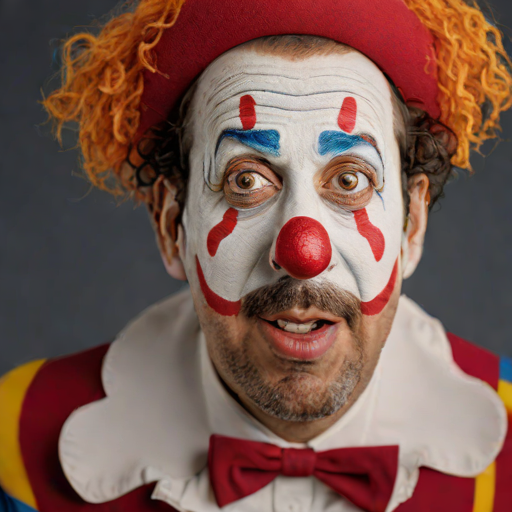

In [32]:
display(image)

  0%|          | 0/5 [00:00<?, ?it/s]

Immagine salvata in: /content/drive/MyDrive/ImmaginiAI/PNG.png


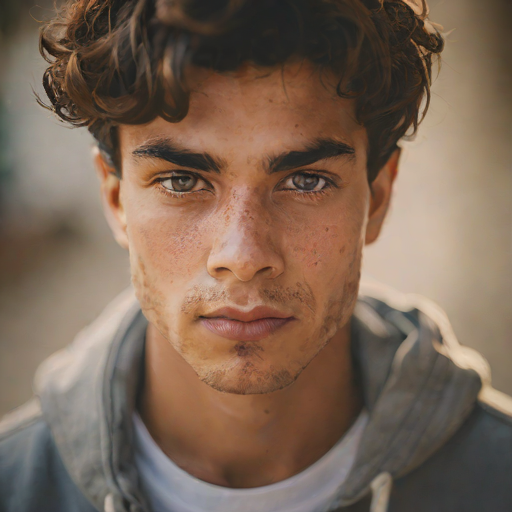

In [28]:
prompt2 = "A hyper-realistic portrait of a young men with soft light, 85mm lens, ultra sharp"
image = pipe(prompt=prompt2, num_inference_steps=5, guidance_scale=0.0).images[0]
image_path = os.path.join(output_dir, "PNG.png")
image.save(image_path)
print(f"Immagine salvata in: {image_path}")
display(image)